In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Enrichment

Enrichment is the stage at which natural uranium is processed to acheive higher concentrations of fissile $^{235}U$ isotopes.

## Learning Objectives

- Recall the isotopic content of natural uranium.
- Identify target enrichments for various applications.
- Distinguish among enrichment technologies.
- Discuss the history of enrichment technology development.
- Calculate separation potentials.
- Quantify the relationship between feed, product, and tails during enrichment.
- Explain the physical and chemical mechanisms of various enrichment technologies.
- Discuss the nonproliferation implications of enrichment technology export control.

## Natural Uranium

Natural uranium, $U_{nat}$, is uranium found in nature. By weight, it contains 0.711% $^{235}U$, 99.284% $^{238}U$, and a trace (0.0055%) of $^{234}U$.


## Enrichment Level

_Commercial LWR Fuel_: Commercial nuclear fuel for light water reactors is typically in the range of 3-5%

_Research Reactor Fuel_: Research reactor fuel (such as TRIGA reactors in many universities) was previously often as high as 40%. However, a downblending effort was undertaken nationally and the fuel is now much less enriched.

_Small Modular Reactor Fuel_: Small modular reactors often bost long running times, such that the fuel rarely needs to be replaced. Though these typically rely on breeding for long term sustainability, the initial enrichment is usually relatively high in these designs.

_Navy Fuel_: Classified, but high. 

_Weapons_: Very high. This varies by weapon type. Does anyone recall the $^{325}U$ enrichment of the Godiva device? (_Hint_: It was 30cm in diameter.)


In [2]:
enr_sources = {'natural U':0.007,
               'recycled U': 0.01}

enr_uses = {'CANDU':0.007,
            'LWR': 0.045,
            'Research':0.20,
            'Weapons': 0.9}

import collections
od_enr_uses = collections.OrderedDict(sorted(enr_uses.items()))

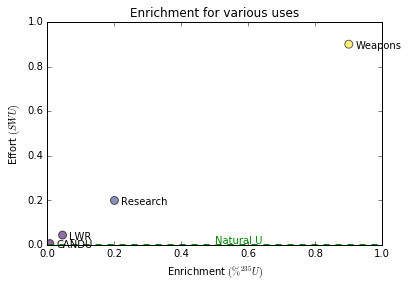

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x=[]
y=[]
delta_x=0.02
delta_y=-0.02

for k,v in od_enr_uses.items():
    x.append(v)
    y.append(v)
    plt.text(v + delta_x, v + delta_y, k)
t = x
area = 20*np.pi
plt.scatter(x, y, s=area, c=t, cmap='viridis', alpha=0.6)
plt.axis([0,1,0,1])
plt.xlabel('Enrichment $(\% ^{235}U)$')
plt.ylabel('Effort $(SWU)$')
plt.title('Enrichment for various uses')
plt.plot(0.007*np.ones(2), 'g--')    
plt.text(0.5, 0.007, 'Natural U', color='g',)

plt.show()

## Gaseous Diffusion

$^{238}UF_6$ and $^{235}UF_6$ have different effusive rates. This is used to separate them through a porous barrier. 

![http://www.pnausa.org/uploads/1/4/6/7/14674962/6292564.jpg?314](http://www.pnausa.org/uploads/1/4/6/7/14674962/6292564.jpg?314)

Effusive rates are based on kinetic energy. At a temperature T, the $UF_6$ molecules have a kinetic energy $kT = \frac{1}{2}mv^2$. Thus, the velocities, are  $v=\sqrt{\left(\frac{2kT}{m}\right)}$

In [60]:
# interestingly, if you use python, you rarely have to remember 
# scientific constants or their SI units
from scipy import constants as sc
print(sc.Boltzmann)
print(sc.unit(u'Boltzmann constant'))

import math 
def vel(t, m):
    k = sc.Boltzmann
    return math.sqrt(2*k*t/m)

1.38064852e-23
J K^-1


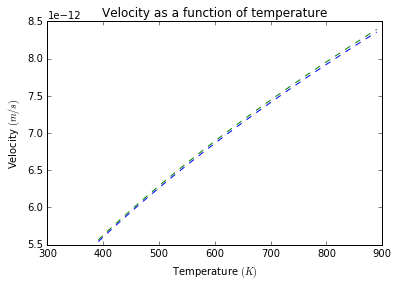

In [61]:
import numpy
T = np.arange(150-32+273.15,650-32+273.15)
m_235 = 235+6*19
m_238 = 238+6*19
v_235 = np.arange(0., 500.)
v_238 = np.arange(0., 500.)

for i in range(0, 500):
    v_235[i] = vel(T[i], m_235)
    v_238[i] = vel(T[i], m_238)
    
    
plt.plot(T, v_235, 'g--')
plt.plot(T, v_238, 'b--')

plt.xlabel('Temperature $(K)$')
plt.ylabel('Velocity $(m/s)$')
plt.title('Velocity as a function of temperature')

plt.show()

The ratio of the speeds, however, at any temperature, remains constant. 

$$\alpha = \frac{V_L}{V_H} = \sqrt{\frac{M_H}{M_L}}$$

In the case of $^{238}UF_6$ and $^{235}UF_6$:

$$M_H = M_{^{238}U} + 6\times M_F$$
$$\Rightarrow M_H = 238 + 6\times 19$$

$$M_L = M_{^{235}U} + 6\times M_F$$
$$\Rightarrow M_H = 235 + 6\times 19$$

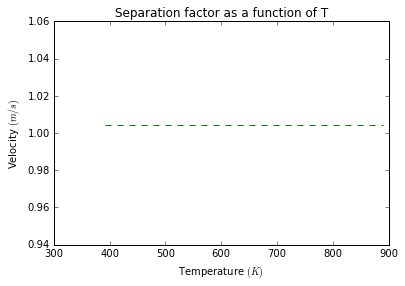

In [14]:

plt.plot(T, v_235/v_238, 'g--')

plt.xlabel('Temperature $(K)$')
plt.ylabel('Velocity $(m/s)$')
plt.title('Separation factor as a function of T')

plt.show()

## The mathematics of Gaseous Diffusion

\begin{align}
F &= \mbox{number of kilograms of feed material (per unit time)}\\
P &= \mbox{number of kilograms of enriched product (per unit time)}\\
W &= \mbox{number of kilograms of uranium in the waste streem (per unit time)}\\
x_f &= \mbox{weight fraction of }^{235}U\mbox{ in the feed material}\\
x_p &= \mbox{weight fraction of }^{235}U\mbox{ in the product material}\\
x_w &= \mbox{weight fraction of }^{235}U\mbox{ in the waste stream (tails assay)}
\end{align}

There are two key equations.

\begin{align}
F &= P+W\\
x_fF &= x_pP + x_wW
\end{align}


---

### Discussion: What is being conserved in each equation?


---

So, if you know your desired enrichment, rate of enrichment, tails fraction, and feed fraction, you can solve for the Feed and Waste rates:

\begin{align}
F &= P \frac{x_p - x_w}{x_f - x_w}\\
W &= P \frac{x_p - x_f}{x_f - x_w}\\
\end{align}

That seems like a lot to know, thought. Two equations aren't really sufficient to solve for 6 variables, so let's define a few more things.

\begin{align}
FF &= \frac{F}{P} = \frac{x_p - x_w}{x_f - x_w}\\
WF &= \frac{W}{P} = \frac{x_p - x_f}{x_f - x_w}\\
\end{align}


Additionally, the work required is referred to in SWU (separative work units). 

\begin{align}
SWU &= \left[P*V(x_p) + W*V(x_w) - F(x_f)\right]\tau\\
\end{align}


The SWUs are defined by the effort required for the various ratios to be acheived. Separation potentials are defined thus:

\begin{align}
V(x_i &= (2x_i-1)ln\left(\frac{x_i}{1-x_i}\right)\\
\end{align}

In [54]:
import math
from math import log 

class Enrichment(object):
    def __init__(self,           
                 f=0, 
                 p=0, 
                 w=0, 
                 x_f=0, 
                 x_p=0, 
                 x_w=0):
        self.f = f
        self.p = p
        self.w = w
        self.x_p = x_p
        self.x_f = x_f
        self.x_w = x_w
        
    
    def f(self, p, w):
        return p - w
    
    def p(self):
        return self.feed - self.tails()
    
    def w(self):
        return self.feed - self.prod()
    
    def feed_factor(self):
        num = self.x_p - self.x_w
        denom = self.x_f - self.x_w
        return num/denom
     
    def waste_factor(self):
        """The waste factor is related to the feed factor"""
        num = self.x_p - self.x_f
        denom = self.x_f - self.x_w
        return num/denom
        
    def v(self, x):
        """separation potential"""
        return 2*x - 1 * log(x/(1-x))
        
    def swu(self, x_p, x_w, x_f):
        return P*self.v(x_p) + T*self.v(x_t) - f*self.v(x_f)
    
    def swu_factor(self, x_p, x_w, x_f):
        sf = self.v(x_p) + self.waste_factor()*self.v(x_w) - \
        self.feed_factor()*self.v(x_f)
        
    def alpha(self, m_h, m_l):
        """separation factor"""
        return math.sqrt(self.m_h/self.m_l)


[ 4.61511985  3.9318203   3.53609869  3.25805383  3.04443898]


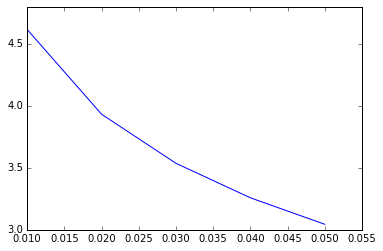

In [59]:
#Plot some separation potentials

gd = Enrichment()

potential = np.arange(1.0, 6.0)
x = potential*0.01

for i in range(0,5):
    potential[i] = gd.v(x[i])    
    
print(potential)
plt.plot(x, potential)


[  0.  nan  nan  nan  nan  nan]


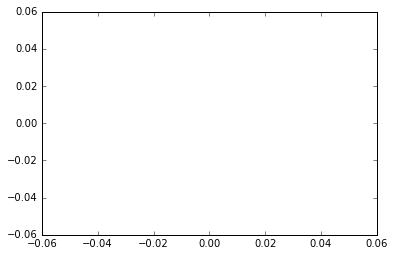

In [42]:

m_h = 238 + 6*19
m_l = 235 + 6*19 
x_w = 0.002
x_f = 0.00711
x_p = 0.03
P = 3.0e5
gd = Enrichment(x_w=x_w, x_p=x_p, x_f=x_f, p=P)

enr = np.arange(0.0, 6.0)
for i in range(1, 6):
    enr[i] = gd.swu_factor(i*0.01, x_w=x_w, x_f=x_f)
    
    
print(enr)
plt.plot(enr)

## Centrifugal Enrichment

![http://world-nuclear.org/uploadedImages/org/info/Nuclear_Fuel_Cycle/Enrichment_and_Conversion/centrfge.jpg](http://world-nuclear.org/uploadedImages/org/info/Nuclear_Fuel_Cycle/Enrichment_and_Conversion/centrfge.jpg)
A bank of centrifuge stages. 

### Centrifugal Force

Centrifugal enrichment relies on the __centrifugal force__. The centrifugal force is only apparent in the rotating reference frame. In the inertial reference frame, it is not apparent, so it is really a 'fictitious' force. 

#### Velocity
Velocity in a rotating frame of reference, with the absolute angular velocity, $\omega$, gives

$$\frac{\operatorname{d}\boldsymbol{r}}{\operatorname{d}t} = \left[\frac{\operatorname{d}\boldsymbol{r}}{\operatorname{d}t}\right] + \boldsymbol{\omega} \times \boldsymbol{r}$$

Note that the square brackets in this notation indicate that the argumet is evaluated in So, the velocity in the rotating reference frame is dependent on the rotation, $\omega$. 

#### Acceleration

Acceleration in a rotating reference frame simply undergoes the same derivative transformation a second time.

$$\begin{align}
\boldsymbol{a} &=\frac{\operatorname{d}^2\boldsymbol{r}}{\operatorname{d}t^2} = \frac{\operatorname{d}}{\operatorname{d}t}\frac{\operatorname{d}\boldsymbol{r}}{\operatorname{d}t} = \frac{\operatorname{d}}{\operatorname{d}t} \left( \left[\frac{\operatorname{d}\boldsymbol{r}}{\operatorname{d}t}\right] + \boldsymbol{\omega} \times \boldsymbol{r}\ \right) \\
 &= \left[ \frac{\operatorname{d}^2 \boldsymbol{r}}{\operatorname{d}t^2} \right] + \frac{\operatorname{d} \boldsymbol{\omega}}{\operatorname{d}t}\times\boldsymbol{r} + 2 \boldsymbol{\omega}\times \left[ \frac{\operatorname{d} \boldsymbol{r}}{\operatorname{d}t} \right] + \boldsymbol{\omega}\times ( \boldsymbol{\omega} \times \boldsymbol{r}) \ .
\end{align}
$$

#### Questions:

- What direction is represented by the vector $\boldsymbol{r}$?
- What direction is represented by the vector $\boldsymbol{\omega}$?
- Combining these facts with the equation above, what can be said about the direction of the velocity vector $\frac{\operatorname{d}\boldsymbol{r}}{\operatorname{d}t}$?
- What about the direction of the acceleration vector $\frac{\operatorname{d}^2 \boldsymbol{r}}{\operatorname{d}t^2}$?



In [ ]:
# An aside about constants.
# Use the built-in constants from the scipy library.
# The gas constant, for example, can be retrieved thus:
from scipy import constants as sc
sc.R

In [ ]:
from scipy import constants as sc

class Centrifugal(Enrichment):
    def alpha(self, m_h, m_l, omega, a, t):
        """
        :param omega: angular speed of rotating bowls (rad/s)
        :param a: inside radius of rotor
        :param m_h: molecular weight of \[^{238}U^{19}F_6\]
        :param m_l: molecular weight of \[^{235}U^{19}F_6\]
        :param r: R, molar gas constant
        :param t: temperature in Kelvin
        """
        return math.exp(((m_h-m_l)*(omega**2)*(a**2))/(2*sc.R*t))

ce = Centrifugal()
ce.alpha(m_h, m_l, 10, 1, 300)    
    

### The Zippe centrifuge

The Zippe centrifuge adds a heating element to ordinary gaseous centrifuge enrichment.  

![https://upload.wikimedia.org/wikipedia/commons/2/27/Zippe-type_gas_centrifuge.svg](https://upload.wikimedia.org/wikipedia/commons/2/27/Zippe-type_gas_centrifuge.svg)

## Nozzle Method

The nozzle method is another type of enrichment technology.

## Laser Enrichment



*note* laser enrichment can be used on other isotopes. Can you think of any uses for this?

## Economics of Enrichment

The enrichment technologies used by industry must be energy effecient and economically feasible. 



## World Enrichment Capacity